<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN demo code

## Learning Objectives


### Core
- Describe how the DBSCAN algorithm builds clusters from any given starting point
- Distinguish between core, border and outlier points
- Use sklearn's implementation of DBSCAN

### Target
- Identify similarities and differences with hierarchical and k-means clustering


### Stretch
- Carry out DBSCAN with sklearn, color points and choose point symbols according to cluster labels
- Evaluate the results with homogeneity, completeness and silhouette scores


## DBSCAN (Density-based Spatial Clustering of Applications with Noise)


DBSCAN is a density based clustering algorithm. The algorithm finds clusters by seeking areas of the dataset that have a higher density of points than the rest of the dataset.

- One of the most widely used clustering algorithms
- Clusters of high density are separated by clusters of low density
- Can form clusters of any shape, not just convex-shaped
- Unlike in the previous examples, DBSCAN may leave data points unassigned to any cluster at all!
- DBSCAN has two input parameters 
    - `min_samples`: the minimum number of points necessary to form a cluster
    - `eps`: the maximal distance within which `min_samples` have to be found to be able to start forming a cluster from any given data point
    - points which are within distance `eps` but do not have enough samples in their own vicinity will be assigned to the same cluster

![](dbscan_illustration.png)

## DBSCAN Algorithm

1. Choose `eps` and `min_samples`
2. Pick an arbitrary point and check if there are at least `min_samples` points within distance `eps`
    - If yes, add those points to the cluster and check each of the new points
    - If not, choose another arbitrary point to start a new cluster
3. Stop once all points have been checked

- A point is a **core point** if at least `min_samples` points are within distance `eps` (including itself)
- A point is a **border point** if it is within distance `eps` of a core point but has less than `min_samples` points within distance `eps`
- An outlier or noise point is a point that is neither a core point nor a border point, i.e. it does neither have `min_samples` points within distance `eps` nor is it within distance `eps` of a core point


Let's play a bit with this [algorithm visualization](http://www.naftaliharris.com/blog/visualizing-dbscan-clustering).

- Now, independently, select the "Pimpled Smiley" distribution of points. What is an optimal epsilon? What about minimum number of points?
 

## DBSCAN compared to K-MEANS and hierarchical clustering

- Cluster shape
    - K-means forms clusters of convex shape
    - DBSCAN can form clusters of any shape and performs especially well with unevenly distributed, non-linearly separable clusters
- Cluster selection
    - K-means assigns clusters based on distance from a central point
    - DBSCAN is density based and assigns clusters based on the number of points in a given area
    - Hierarchical clustering uses a similarity measure
- Outliers
    - K-means is sensitive to outliers
    - DBSCAN is more robust
- Cluster size
    - K-means assigns evenly sized clusters 
    - DBSCAN and hierarchical clustering can have clusters of varying size
- Label Assignment
    - K-means and hierarchical clustering assign a cluster label to each data point whereas DBSCAN might not assign any label to some of the points
- Number of clusters
    - K-means forms K clusters
    - DBSCAN or hierarchical clustering do not require a priori fixing the number of clusters
- Reproducability
    - K-means depends on the initialization point
    - DBSCAN depends on the order of points visited
    - Hierarchical clustering is deterministic
- Distance measures
    - K-means requires Euclidean distances
    - DBSCAN and hierarchical clustering allow different choices of metrics
    
Additionally, DBSCAN is sensitive to the parameter choice. If the density varies strongly, it might not be possible to find a suitable epsilon for the whole dataset

## Sklearn implementation

To implement DBSCAN in Python, we first import it from sklearn: 

```python
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10)
db.fit(X)
core_samples = db.core_sample_indices_
labels = db.labels_
```


Sklearn's DBSCAN algorithm returns two items - the core samples and the labels. The core samples are the points which have enough neighbors within the given distance.
The labels are the cluster labels. They may differ between different runs.


[Sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

### Load the data

In [2]:
iris = datasets.load_iris()

### Identify target and features

In [3]:
X, y = iris.data, iris.target

### Standardize X

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

### Explore the data to look for potential clusters - see any?

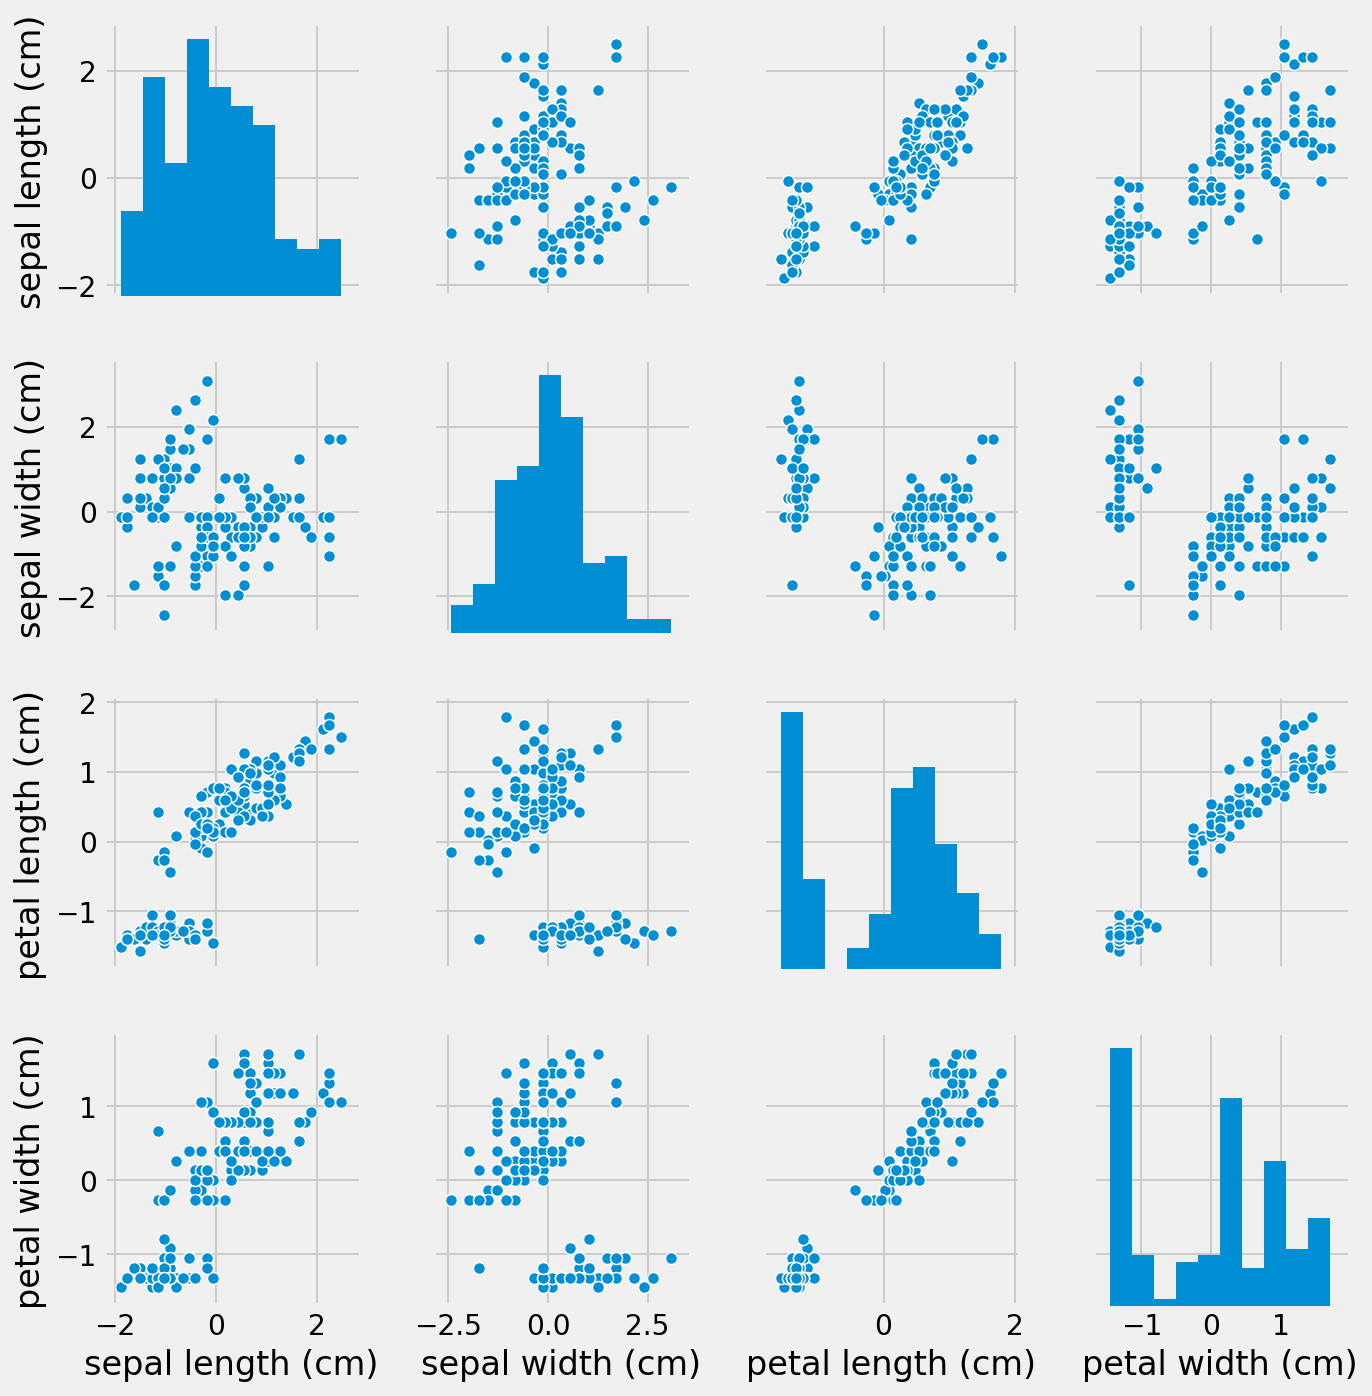

In [5]:
sns.pairplot(pd.DataFrame(X, columns=iris.feature_names))
plt.show()

### Setup DBSCAN

In [6]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

### Set labels

In [7]:
print("Labels:")
labels = dbscan.labels_
print(labels)

Labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1 -1 -1  1 -1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1 -1  1  1  1  1 -1 -1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1  1  1  1  1  1  1  1
  1  1  1  1 -1  1]


### Identify core samples

In [8]:
# Extract core sample indices
print(dbscan.core_sample_indices_)

[  0   1   2   3   4   5   6   7   9  10  11  12  17  19  20  21  23  24
  25  26  27  28  29  30  31  34  35  36  37  38  39  40  42  43  44  45
  46  47  48  49  52  54  55  58  61  63  64  65  66  67  69  71  73  74
  75  77  78  79  80  81  82  83  86  88  89  90  91  92  94  95  96  97
  99 101 103 104 110 111 112 116 120 123 126 133 137 138 139 140 141 142
 143 145 147]


In [9]:
core_samples = np.zeros_like(labels, dtype=bool)

In [10]:
core_samples

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [11]:
core_samples[dbscan.core_sample_indices_] = True
core_samples

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True, False, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True, False,
        True,  True, False, False,  True, False, False,  True, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True, False,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False,  True,
       False, False, False,  True, False, False,  True, False, False,
        True, False,

In [12]:
print("Core samples")
print((core_samples * 1))

Core samples
[1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 1 1 0 1 0 1 0 1
 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1
 1 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1
 0 0]


### Declare the number of clusters

In [13]:
n_clusters_ = len(set(labels) - set([-1]))
print(n_clusters_)

2


Now, we can use a handy chunk of code from the [Scikit documentation](http://scikit-learn.org/stable/modules/clustering.html) to measure the performance of our model.

- **Homogeneity:** each cluster contains only members of a single class.
- **Completeness:** all members of a given class are assigned to the same cluster.
- **V-measure:** the harmonic mean between homogeneity and completeness.
- **Silhouette Coefficient:** The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

In [14]:
np.unique(y)

array([0, 1, 2])

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [16]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

In [17]:
print()
print('Estimated number of clusters:\t %d' % n_clusters_)
print("Homogeneity:\t\t\t %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness:\t\t\t %0.3f" % metrics.completeness_score(y, labels))
print("V-measure:\t\t\t %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient:\t\t %0.3f"
      % metrics.silhouette_score(X, labels))


Estimated number of clusters:	 2
Homogeneity:			 0.501
Completeness:			 0.523
V-measure:			 0.511
Silhouette Coefficient:		 0.357


### Count majority cluster labels according to class label 

In [18]:
np.unique(labels)

array([-1,  0,  1])

In [19]:
print(((labels[:50]) == 0).sum())
print(((labels[50:100]) == 1).sum())
print(((labels[100:]) == -1).sum())
print()
# Relabel class label 2 -> -1
y_relabeled = pd.Series(y).map(lambda x: -1 if x == 2 else x)

print("Confusion matrix:")
print(metrics.confusion_matrix(y_relabeled, labels, labels=np.unique(labels)))
print("Classification report")
print(metrics.classification_report(y_relabeled, labels, labels=np.unique(labels)))

45
39
18

Confusion matrix:
[[18  0 32]
 [ 5 45  0]
 [11  0 39]]
Classification report
              precision    recall  f1-score   support

          -1       0.53      0.36      0.43        50
           0       1.00      0.90      0.95        50
           1       0.55      0.78      0.64        50

    accuracy                           0.68       150
   macro avg       0.69      0.68      0.67       150
weighted avg       0.69      0.68      0.67       150



### Color and symbol map for plot

In [20]:
def color_map(x):
    if x == 0:
        return 'r'
    elif x == 1:
        return 'b'
    elif x == -1:
        return 'g'
    else:
        return 'k'


def symbol_map(x):
    if x == 0:
        return 'x'
    elif x == 1:
        return 'o'
    elif x == 2:
        return 'd'

Cluster color: -1 -> g
Cluster color: 0 -> r
Cluster color: 1 -> b
Class 0: x
Class 1: o
Class 2: d


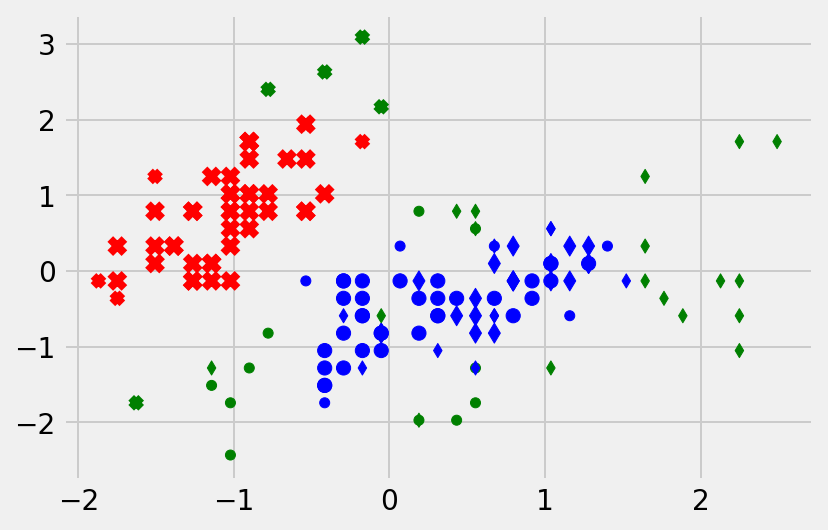

In [21]:
# use different pointsizes for core samples and non-core samples
sizes = [25, 50]

for i in range(-1, 2):
    
    print('Cluster color: {} -> {}'.format(i, color_map(i)))
    
# loop over different classes    
for i in range(3):
    
    print('Class {}: {}'.format(i, symbol_map(i)))
    
    # loop over core and non-core samples
    for j in [True, False]:
        
        plt.scatter(X[(y == i) & (core_samples == j), 0], 
                    X[(y == i) & (core_samples == j), 1],
                    # use different colors for different cluster labels
                    c=[color_map(x) for x in labels[(y == i) & (core_samples == j)]], 
                    s=sizes[j],
                    # use different markers for different calsses
                    marker=symbol_map(i))
plt.show()